Columns in the DataFrame: Index(['PLAYER_ID', 'TEAM_ID', 'GAME_ID', 'GAME_DATE', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK', 'AVAILABLE_FLAG', 'MIN_SEC',
       'NET_RANKING', 'TEAM_ID.1', 'TEAM_CITY', 'PLAYER_ID.1',
       'START_POSITION', 'COMMENT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
    

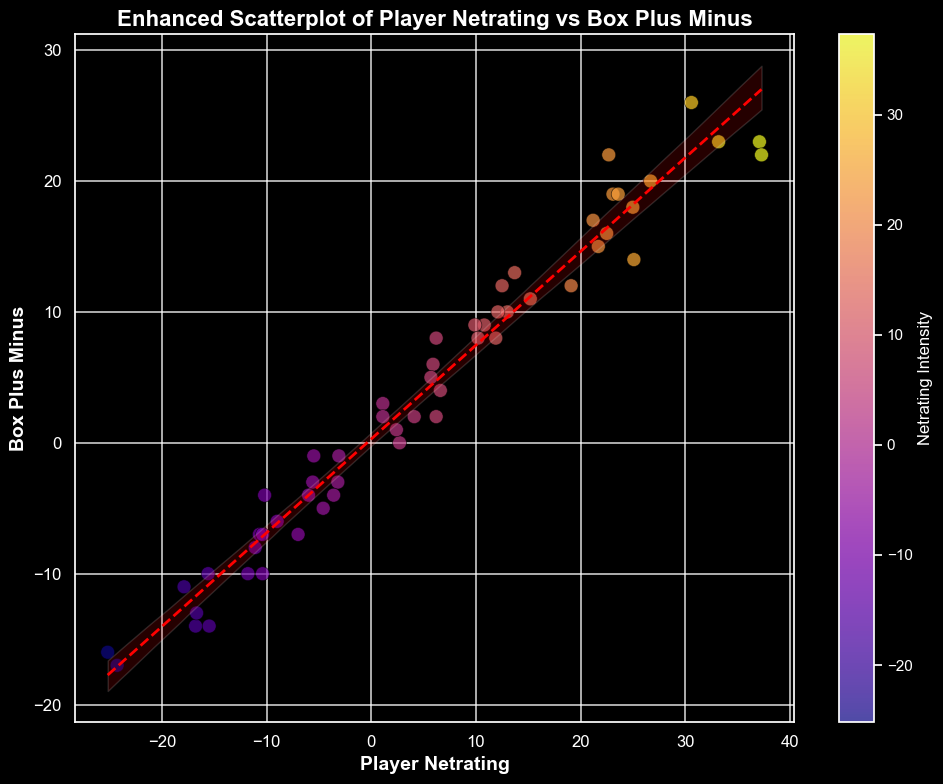

In [43]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

excel_file_path = r"C:\Users\Vasav\OneDrive\Documents\GitHub\SIS\player_season\final_box&data_player_data_for_2022\2544.csv"
player_data = pd.read_csv(excel_file_path)

print("Columns in the DataFrame:", player_data.columns)

netrating_column = 'NET_RATING'
plusminus_column = 'PLUS_MINUS'

player_team_data = player_data.dropna(subset=[netrating_column, plusminus_column])

player_team_data[netrating_column] = pd.to_numeric(player_team_data[netrating_column], errors='coerce')
player_team_data[plusminus_column] = pd.to_numeric(player_team_data[plusminus_column], errors='coerce')

print(player_team_data.head())

norm = plt.Normalize(player_team_data[netrating_column].min(), player_team_data[netrating_column].max())

plt.figure(figsize=(10, 8), facecolor='black')
scatter = plt.scatter(
    player_team_data[netrating_column], player_team_data[plusminus_column],
    c=player_team_data[netrating_column], cmap="plasma", s=100, alpha=0.7, edgecolor='black', linewidth=0.5
)

sns.regplot(
    x=netrating_column, y=plusminus_column, data=player_team_data,
    scatter=False, color='red', line_kws={"linewidth": 2, "linestyle": "--"}
)

plt.title("Enhanced Scatterplot of Player Netrating vs Box Plus Minus", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Player Netrating", fontsize=14, fontweight='bold', color='white')
plt.ylabel("Box Plus Minus", fontsize=14, fontweight='bold', color='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

ax = plt.gca()

ax.xaxis.grid(color='white', linestyle='-', linewidth=1.2, alpha=0.8)
ax.yaxis.grid(color='white', linestyle='-', linewidth=1.2, alpha=0.8)  

ax.set_facecolor('black')

cbar = plt.colorbar(scatter, orientation='vertical')
cbar.set_label('Netrating Intensity', fontsize=12, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.show()
